Ships and Bikes model:

In [25]:
!pip install Image
from bs4 import BeautifulSoup
import numpy as np
import requests
import cv2
import PIL.Image
import urllib
import matplotlib.pyplot as plt
%matplotlib inline
ships_page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n04194289")#ship synset
print(ships_page.content)
# BeautifulSoup is an HTML parsing library
ships_soup = BeautifulSoup(ships_page.content, 'html.parser')#puts the content of the website into the soup variable, each url on a different line

b"http://static.flickr.com/85/233578996_8f74463083.jpg\r\nhttp://farm3.static.flickr.com/2317/2472759369_f4cc1ff8a0.jpg\r\nhttp://static.flickr.com/2173/2071797511_200e3e4d2e.jpg\r\nhttp://farm2.static.flickr.com/1019/534041866_3aa182311c.jpg\r\nhttp://static.flickr.com/88/231940102_7beb5ecf3e.jpg\r\nhttp://farm4.static.flickr.com/3138/2724596903_d74dd64821.jpg\r\nhttp://static.flickr.com/174/453920264_9406e9972c.jpg\r\nhttp://farm2.static.flickr.com/1419/1408865234_caf87d02e3.jpg\r\nhttp://farm1.static.flickr.com/147/423542865_c091691a6b.jpg\r\nhttp://farm3.static.flickr.com/2074/2367492616_272bf6af6a.jpg\r\nhttp://farm2.static.flickr.com/1081/1365111200_8d105d9fb1.jpg\r\nhttp://farm3.static.flickr.com/2269/2348294071_94fc609f4a.jpg\r\nhttp://static.flickr.com/1016/1443997081_b5eb875055.jpg\r\nhttp://www.walleniuslines.com/img_upload/maersk_teal.jpg\r\nhttp://www.fondear.org/infonautic/Barco/Barco_Navegando/Contenedores_Peligro/sea_container_ship2.jpg\r\nhttp://static.flickr.com/198/4

In [2]:
bikes_page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02834778")#bicycle synset
print(bikes_page.content)
# BeautifulSoup is an HTML parsing library
from bs4 import BeautifulSoup
bikes_soup = BeautifulSoup(bikes_page.content, 'html.parser')#puts the content of the website into the soup variable, each url on a different line

b"http://farm2.static.flickr.com/1089/537335018_9813e94757.jpg\r\nhttp://members.lycos.nl/zwawe/hpbimg/fiets3.jpg\r\nhttp://communities.canada.com/shareit/photos/bicycles/images/64838/425x286.aspx\r\nhttp://farm2.static.flickr.com/1090/1441125154_341230126c.jpg\r\nhttp://farm4.static.flickr.com/3219/2681908945_dbe4c38deb.jpg\r\nhttp://farm3.static.flickr.com/2186/2358375851_fa98bf5314.jpg\r\nhttp://farm3.static.flickr.com/2375/2463989860_28a9d6743c.jpg\r\nhttp://bluh.nl/images/portfolio/grafisch/fiets.jpg\r\nhttp://www.bakkeveen.nl/Ondernemers/Bolhuis/2003_3_22_A.jpg\r\nhttp://upload.wikimedia.org/wikipedia/commons/a/a1/A_Bicycle_in_Oxford.JPG\r\nhttp://farm1.static.flickr.com/220/503379999_8301b3ed00.jpg\r\nhttp://farm3.static.flickr.com/2266/2539943000_005b996b1e.jpg\r\nhttp://home.kooee.com.au/nobananas/images/clayton-bike-1.jpg\r\nhttp://farm1.static.flickr.com/21/26188741_0a4a18d992.jpg\r\nhttp://farm3.static.flickr.com/2085/1642604624_4ca84a32c4.jpg\r\nhttp://www.bikeracks.us/ima

Split the URLs (each on a separate line) and store in a list

In [3]:
str_ships_soup=str(ships_soup)#convert soup to string so it can be split
type(str_ships_soup)
ships_split_urls=str_ships_soup.split('\r\n')#split so each url is a different possition on a list
print("The length of the ships list is ",len(ships_split_urls))#print the length of the list so you know how many urls you have

bikes_str_soup=str(bikes_soup)#convert soup to string so it can be split
type(bikes_str_soup)
bikes_split_urls=bikes_str_soup.split('\r\n')#split so each url is a different possition on a list
print("The length of the bikes list is ", len(bikes_split_urls))

The length of the ships list is  1262
The length of the bikes list is  1345


Make training and validation directories

In [0]:
!mkdir /content/train #create the Train folder
!mkdir /content/train/ships #create the ships folder
!mkdir /content/train/bikes #create the bikes folder
!mkdir /content/validation
!mkdir /content/validation/ships #create the ships folder
!mkdir /content/validation/bikes #create the bikes folder

Correct the images shape, format, and store them on the corresponding directory

In [5]:
img_rows, img_cols = 32, 32 #number of rows and columns to convert the images to
input_shape = (img_rows, img_cols, 3)#format to store the images (rows, columns,channels) called channels last
def url_to_image(url):
 # download the image, convert it to a NumPy array, and then read
 # it into OpenCV format
 resp = urllib.request.urlopen(url)
 image = np.asarray(bytearray(resp.read()), dtype="uint8")
 image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
 # return the image
 return image

n_of_training_images=100 #the number of training images to use
for progress in range(n_of_training_images):#store all the images on a directory
    # Print out progress whenever progress is a multiple of 20 so we can follow the
    # (relatively slow) progress
    if(progress%20==0):
        print(progress)
    if not ships_split_urls[progress] == None:
      try:
        I = url_to_image(ships_split_urls[progress])
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/train/ships/img'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)
      except:
        None

#do the same for bikes:
for progress in range(n_of_training_images):#store all the images on a directory
    # Print out progress whenever progress is a multiple of 20 so we can follow the
    # (relatively slow) progress
    if(progress%20==0):
        print(progress)
    if not bikes_split_urls[progress] == None:
      try:
        I = url_to_image(bikes_split_urls[progress])
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/train/bikes/img'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)
      except:
        None
        
        
        
#Validation data:
for progress in range(50):#store all the images on a directory
    # Print out progress whenever progress is a multiple of 20 so we can follow the
    # (relatively slow) progress
    if(progress%20==0):
        print(progress)
    if not ships_split_urls[progress] == None:
      try:
        I = url_to_image(ships_split_urls[n_of_training_images+progress])#get images that are different from the ones used for training
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/validation/ships/img'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)
      except:
        None

#do the same for bikes:
for progress in range(50):#store all the images on a directory
    # Print out progress whenever progress is a multiple of 20 so we can follow the
    # (relatively slow) progress
    if(progress%20==0):
        print(progress)
    if not bikes_split_urls[progress] == None:
      try:
        I = url_to_image(bikes_split_urls[n_of_training_images+progress])#get images that are different from the ones used for training
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/validation/bikes/img'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)
      except:
        None
        
print("\nTRAIN:\n")          
print("\nlist the files inside ships directory:\n")        
!ls /content/train/ships #list the files inside ships
print("\nlist the files inside bikes directory:\n")
!ls /content/train/bikes #list the files inside bikes
print("\nVALIDATION:\n")
print("\nlist the files inside ships directory:\n")        
!ls /content/validation/ships #list the files inside ships
print("\nlist the files inside bikes directory:\n")
!ls /content/validation/bikes #list the files inside bikes


0
20
40
60
80
0
20
40
60
80
0
20
40
0
20
40

TRAIN:


list the files inside ships directory:

img0.jpg   img24.jpg  img35.jpg  img4.jpg   img62.jpg  img74.jpg  img93.jpg
img11.jpg  img25.jpg  img39.jpg  img51.jpg  img63.jpg  img76.jpg  img94.jpg
img12.jpg  img26.jpg  img3.jpg	 img52.jpg  img64.jpg  img77.jpg  img95.jpg
img14.jpg  img28.jpg  img40.jpg  img54.jpg  img66.jpg  img78.jpg  img96.jpg
img15.jpg  img29.jpg  img43.jpg  img55.jpg  img67.jpg  img83.jpg  img97.jpg
img16.jpg  img31.jpg  img46.jpg  img56.jpg  img69.jpg  img86.jpg  img99.jpg
img17.jpg  img32.jpg  img47.jpg  img59.jpg  img6.jpg   img8.jpg
img18.jpg  img33.jpg  img48.jpg  img5.jpg   img72.jpg  img91.jpg
img23.jpg  img34.jpg  img49.jpg  img60.jpg  img73.jpg  img92.jpg

list the files inside bikes directory:

img10.jpg  img27.jpg  img45.jpg  img59.jpg  img70.jpg  img82.jpg  img93.jpg
img13.jpg  img31.jpg  img47.jpg  img5.jpg   img71.jpg  img83.jpg  img95.jpg
img14.jpg  img33.jpg  img48.jpg  img60.jpg  img72.jpg  img84.jpg

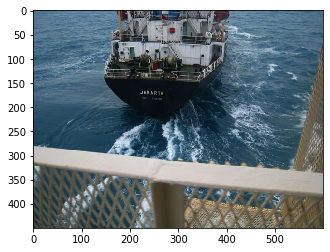

In [27]:

test=PIL.Image.open("/content/train/ships/img99.jpg")
plt.imshow(test)

Building the model:

In [28]:
import tensorflow as tf
model=tf.keras.models.Sequential([
    #The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(img_rows, img_cols, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')                               
])
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________

In [29]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


(Insert CallBack if needed)

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/train/',  # This is the source directory for training images
        target_size=(32, 32),  # All images will be resized to 150x150
        batch_size=16,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/content/validation/',  # This is the source directory for training images
        target_size=(32, 32),  # All images will be resized to 150x150
        batch_size=16,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 119 images belonging to 2 classes.
Found 70 images belonging to 2 classes.


Training the model:

In [31]:
model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs=20,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=5
)

Epoch 1/20
8/8 [==============================] - 7s 887ms/step - loss: 0.7069 - acc: 0.4622 - val_loss: 0.6406 - val_acc: 0.8571
Epoch 2/20
8/8 [==============================] - 1s 102ms/step - loss: 0.6632 - acc: 0.5966 - val_loss: 0.5408 - val_acc: 0.8143
Epoch 3/20
8/8 [==============================] - 1s 108ms/step - loss: 0.5174 - acc: 0.7395 - val_loss: 0.4095 - val_acc: 0.8571
Epoch 4/20
8/8 [==============================] - 1s 117ms/step - loss: 0.5768 - acc: 0.7227 - val_loss: 0.4777 - val_acc: 0.8714
Epoch 5/20
8/8 [==============================] - 1s 106ms/step - loss: 0.5367 - acc: 0.7479 - val_loss: 0.4728 - val_acc: 0.8143
Epoch 6/20
8/8 [==============================] - 1s 104ms/step - loss: 0.4380 - acc: 0.8319 - val_loss: 0.3510 - val_acc: 0.8429
Epoch 7/20
8/8 [==============================] - 1s 108ms/step - loss: 0.4314 - acc: 0.8151 - val_loss: 0.3835 - val_acc: 0.8286
Epoch 8/20
8/8 [==============================] - 1s 109ms/step - loss: 0.4866 - acc: 0.79

Running the model with novel images:

In [19]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(32, 32))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a bicycle")
  else:
    print(fn + " is a ship")

Saving surly_bikes.jpg to surly_bikes (1).jpg
[0.99896145]
surly_bikes.jpg is a bicycle
